In [1]:
# Importing libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image
import functions
from GP_action import GP_action
import time
import imageio

In [2]:
Noise= True# Specify if noisy or not
Noise_level= 0.05 # if noisy, what is the noise sd
'''If the scaled X and Y is being used rememeber to scale the noise as well'''

'If the scaled X and Y is being used rememeber to scale the noise as well'

In [3]:
# The target function is assigned, chose 1 from the below
objective=functions.Shubert()
objective=functions.Branin()
objective=functions.Hartmann_6()
objective=functions.Hartmann_3()
objective=functions.Ackley()
objective=functions.Rosenbrock()
objective=functions.sin()
objective=functions.Synthetic()
objective=functions.Kean()
objective=functions.sincos(Noise,Noise_level)
#objective=functions.sin_2(Noise,Noise_level)



print(objective.bounds)
# Extracting the bounded range of the inputs
func_bounds=bounds=np.array(
            [item[1] for item in sorted(objective.bounds.items(), key=lambda x: x[0])],dtype=np.float)
print(func_bounds)
print(objective.func(np.array([3,1])))


{'x': (-4, 4), 'y': (-4, 4)}
[[-4.  4.]
 [-4.  4.]]
0.07624746575887673


In [4]:
# max budget for finding good point
Budget=25

# Acq_names=['PI','PG','EI','EG','gp_ucb','random','TS','SATS','G_ES','MES','GD']
acquation_function='GD'
function_bounds=func_bounds


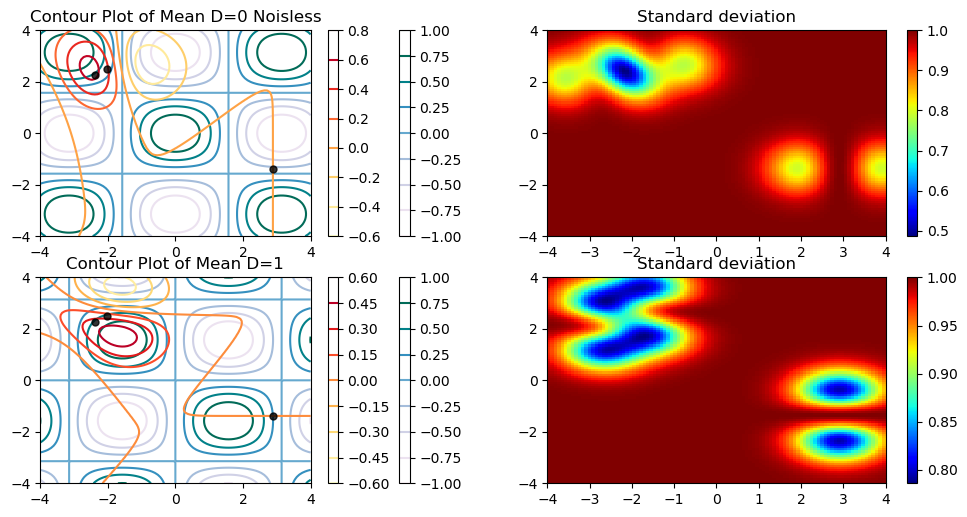

0.9995231724991412


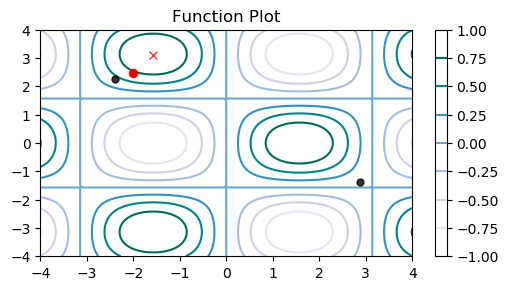

0
recommended x=[-1.34951311  2.850406  ] current y=0.935, ymax=0.935


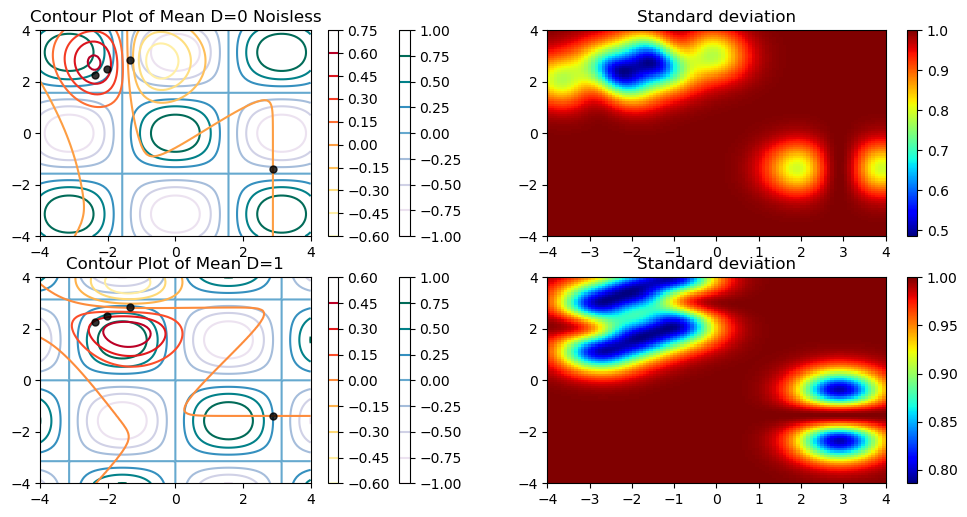

0.9995231724991412


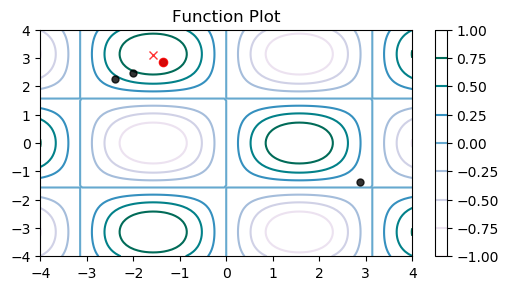

1
recommended x=[-1.33192458  2.85776645] current y=0.933, ymax=0.935


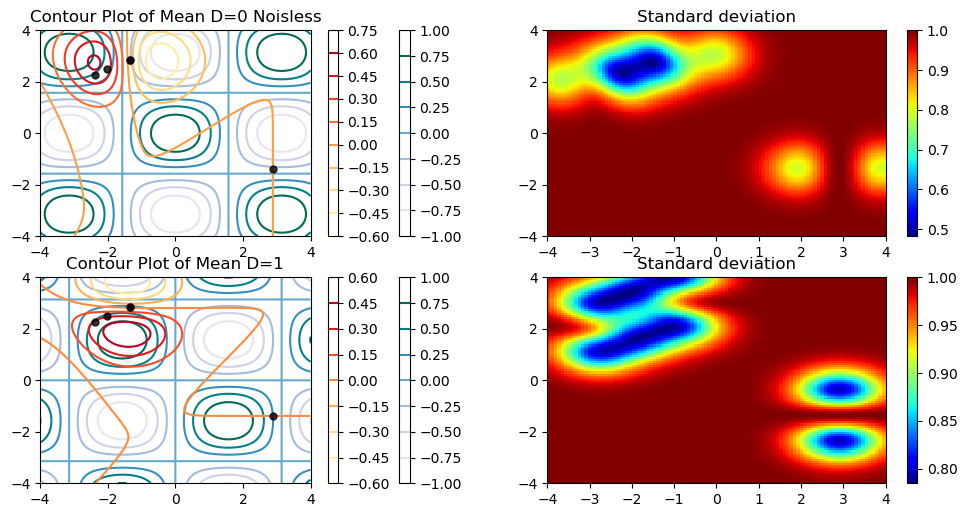

0.9995231724991412


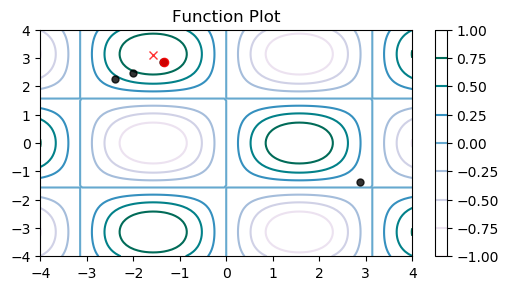

2
recommended x=[-1.4569841   2.79665465] current y=0.935, ymax=0.935


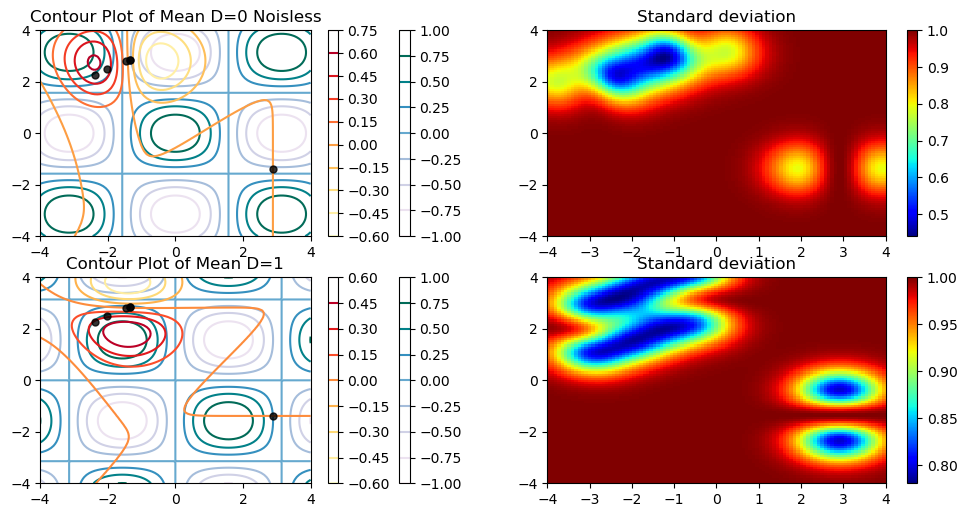

0.9995231724991412


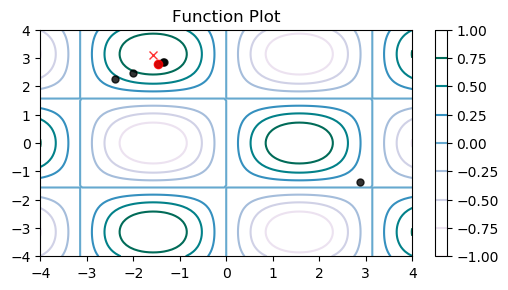

3
recommended x=[-1.32629144  2.86002312] current y=0.932, ymax=0.935


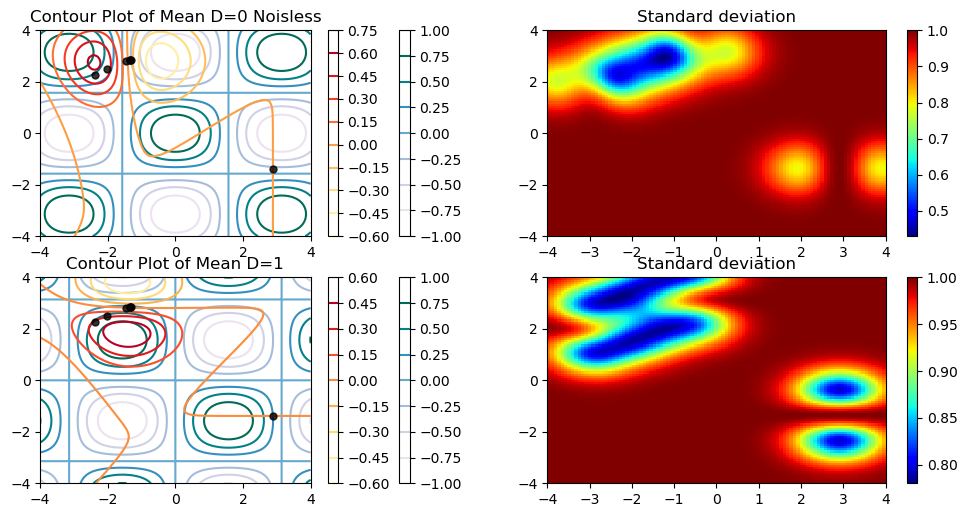

0.9995231724991412


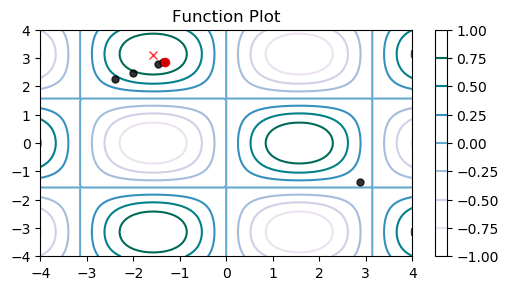

4
recommended x=[-1.50008429  2.77648242] current y=0.932, ymax=0.935


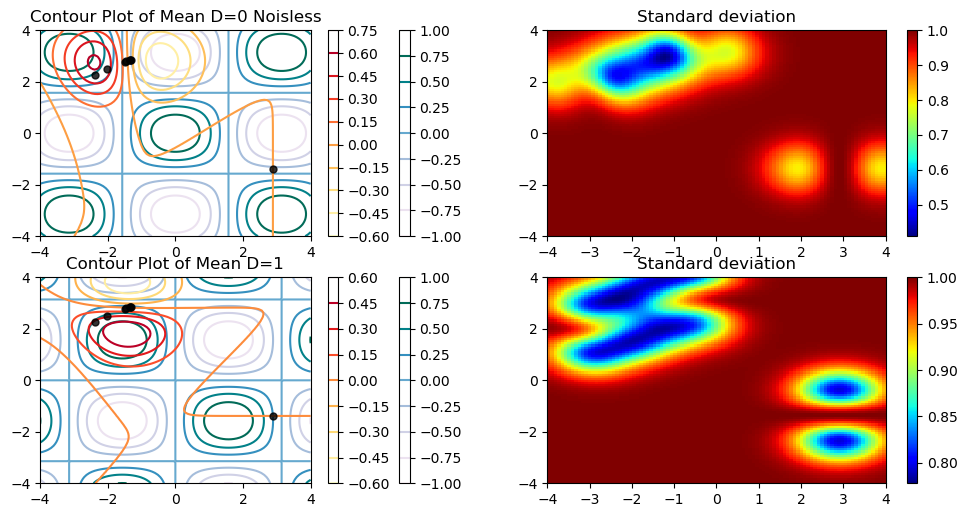

0.9995231724991412


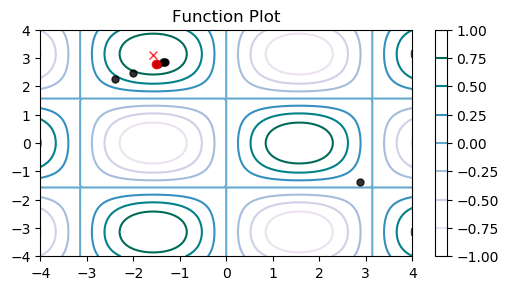

5
recommended x=[-1.29168404  2.88629552] current y=0.930, ymax=0.935


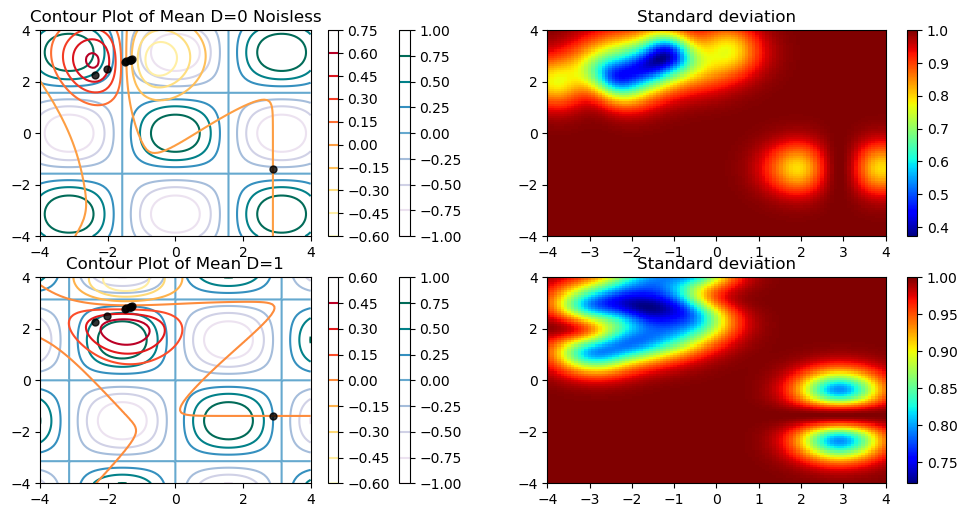

0.9995231724991412


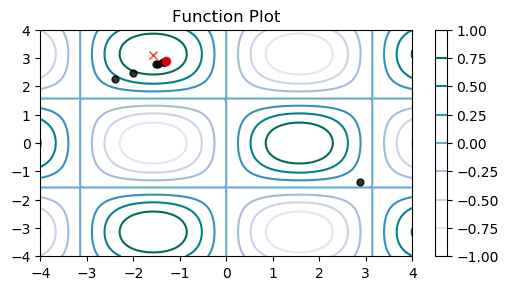

6
recommended x=[-1.5647547   2.89340708] current y=0.969, ymax=0.969


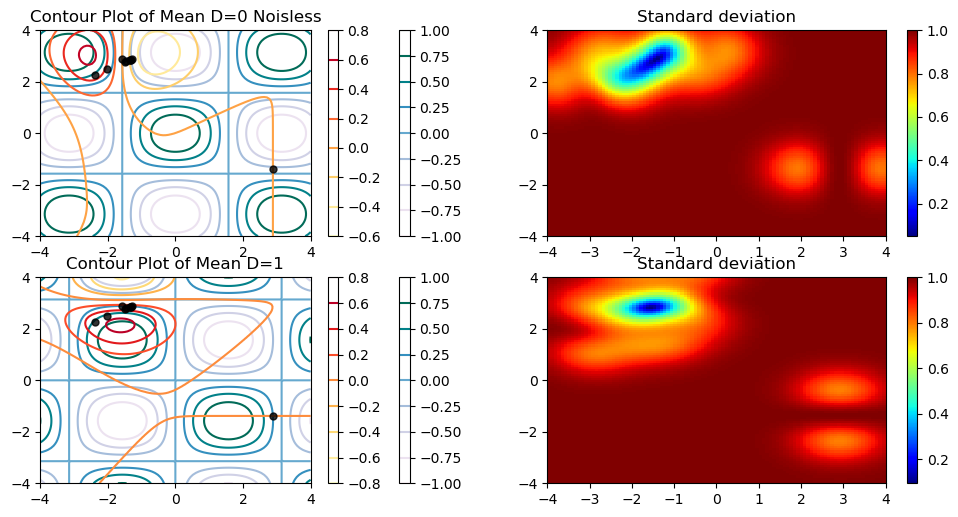

0.9995231724991412


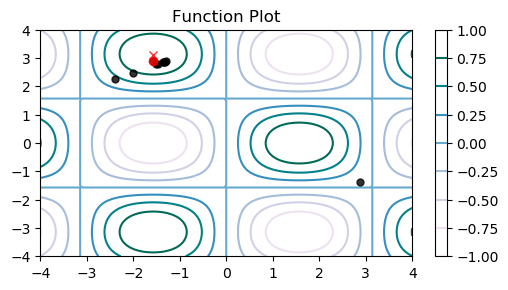

7
recommended x=[-1.46517462  3.24378751] current y=0.989, ymax=0.989


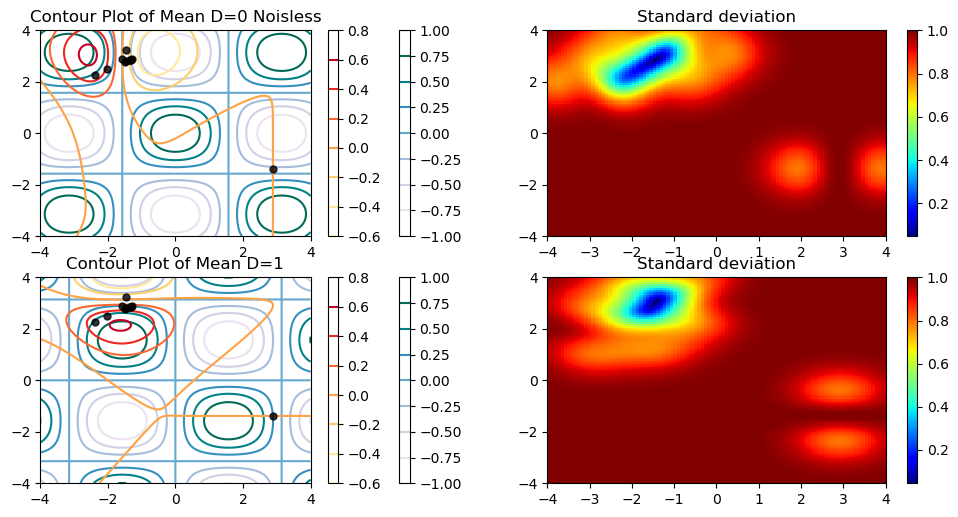

0.9995231724991412


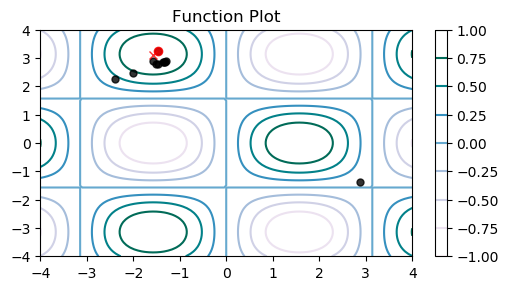

8
recommended x=[-1.61768924  2.99239787] current y=0.988, ymax=0.989


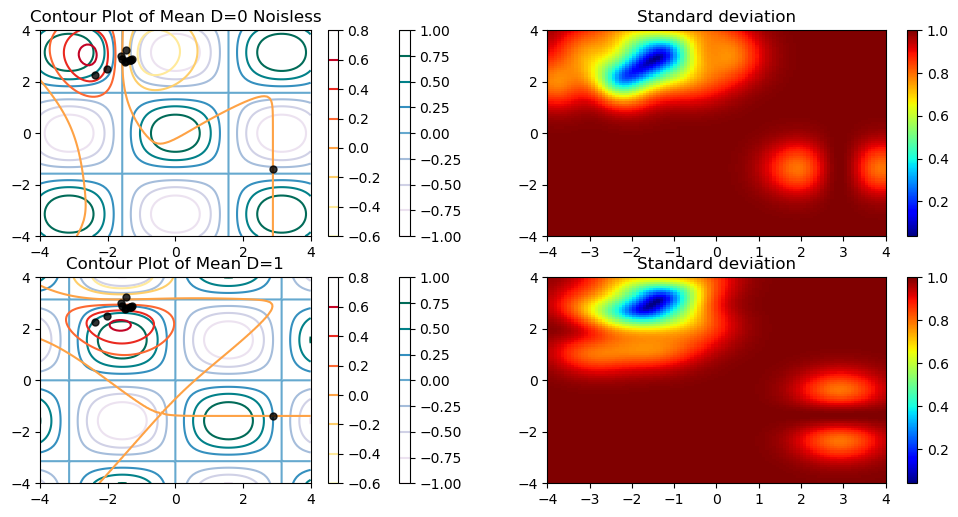

0.9995231724991412


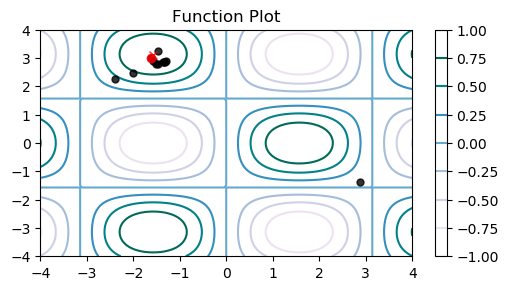

9
recommended x=[-1.48664523  3.30096187] current y=0.984, ymax=0.989


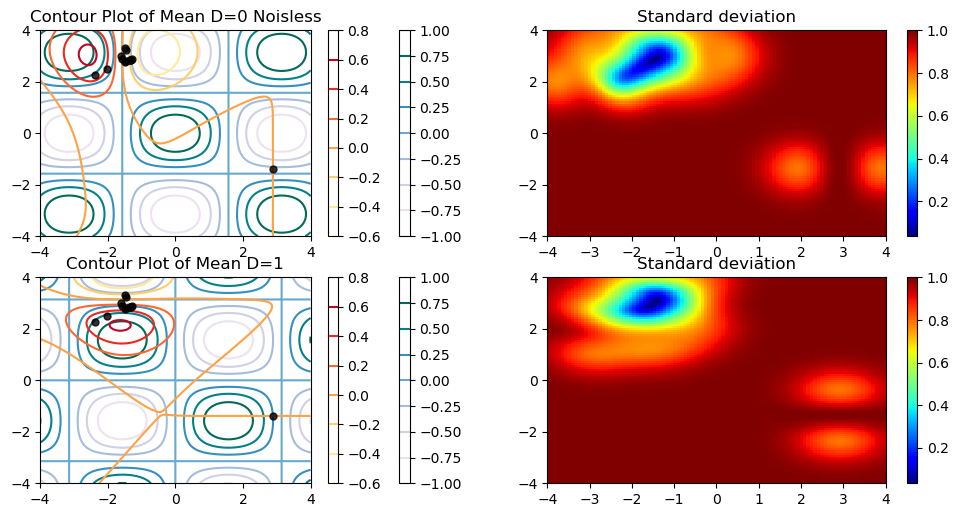

0.9995231724991412


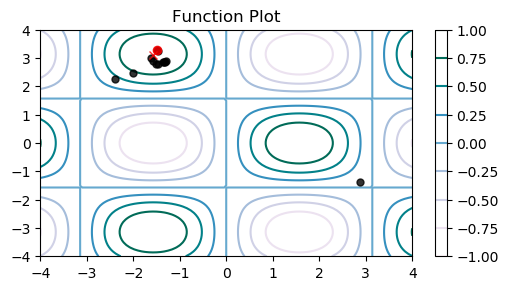

10
recommended x=[-1.62399931  2.99438045] current y=0.988, ymax=0.989


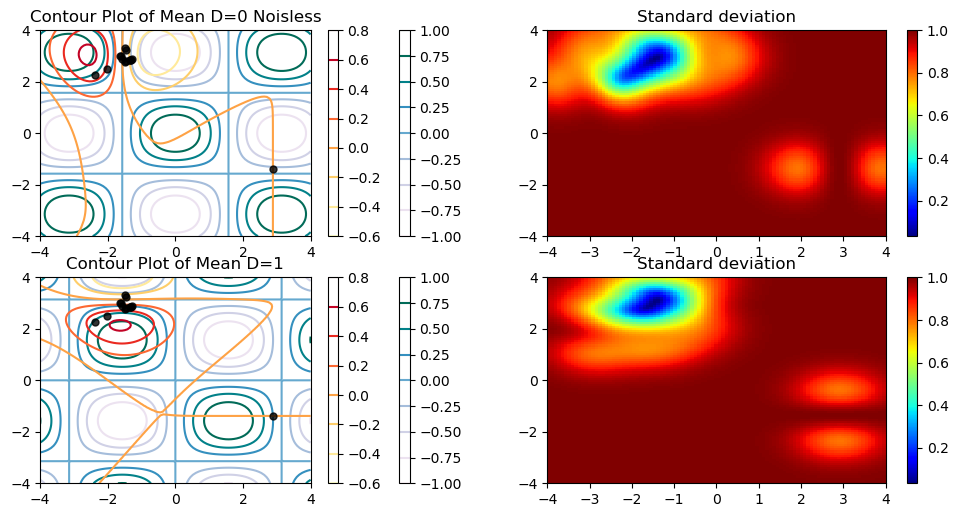

0.9995231724991412


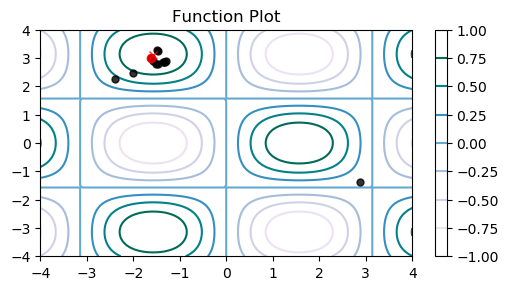

11
recommended x=[-1.49254091  3.31131675] current y=0.983, ymax=0.989


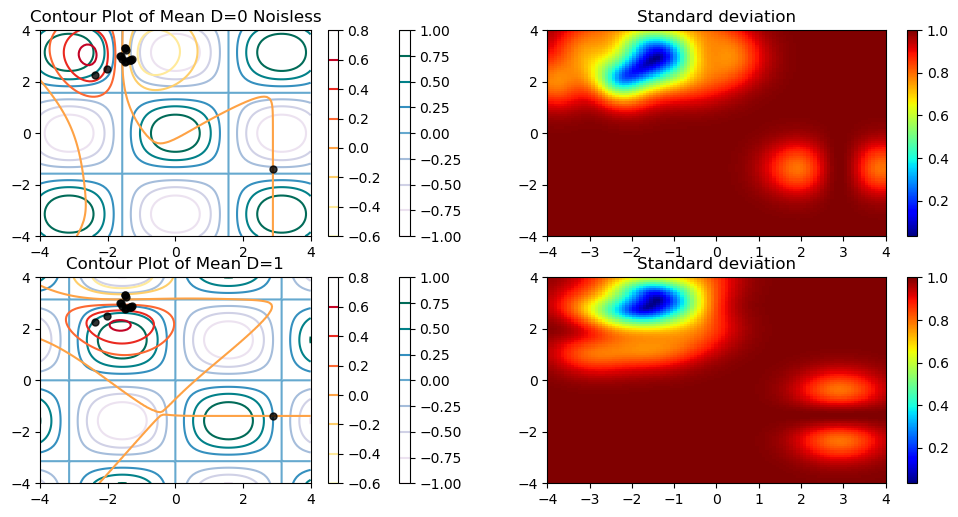

0.9995231724991412


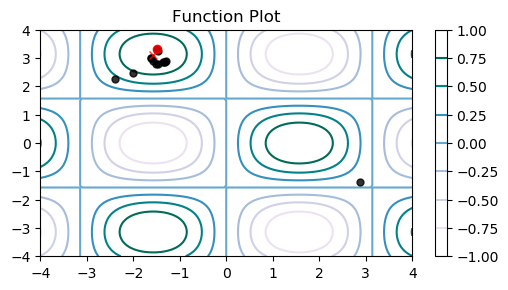

12
recommended x=[-1.62112611  2.99309658] current y=0.988, ymax=0.989


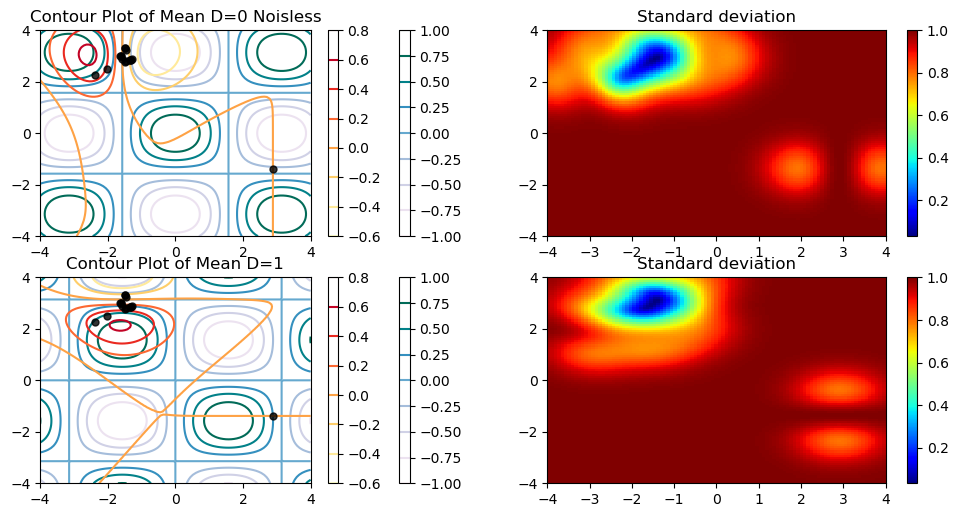

0.9995231724991412


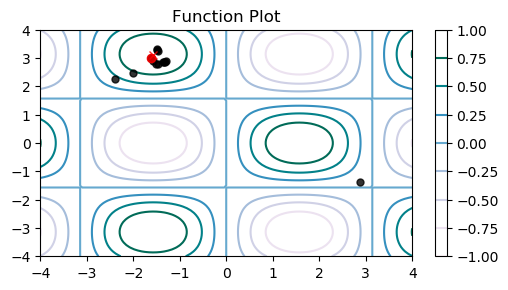

13
recommended x=[-1.49749202  3.31370295] current y=0.983, ymax=0.989


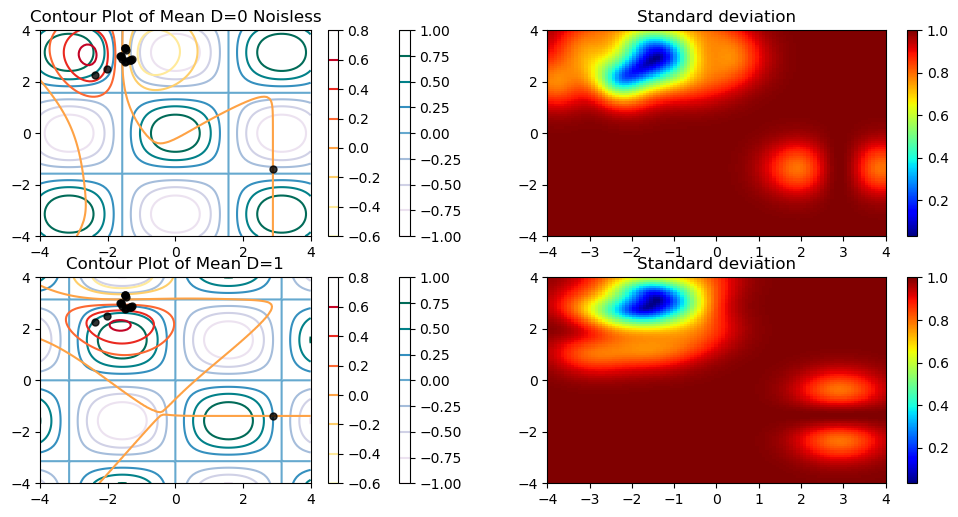

0.9995231724991412


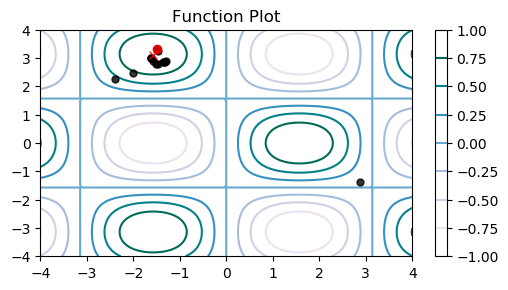

14
recommended x=[-1.61804103  2.99145575] current y=0.988, ymax=0.989


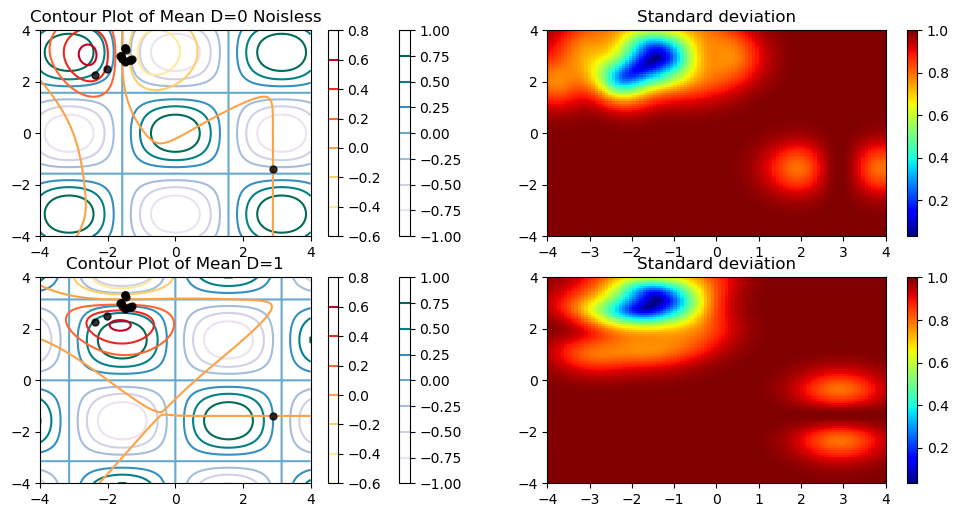

0.9995231724991412


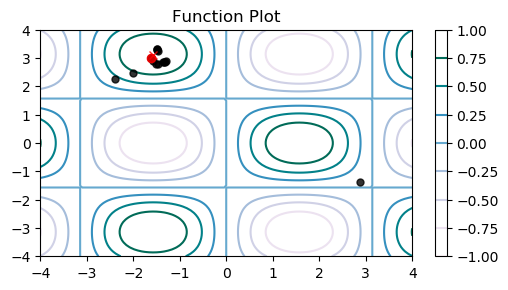

15
recommended x=[-1.50188614  3.31491666] current y=0.983, ymax=0.989


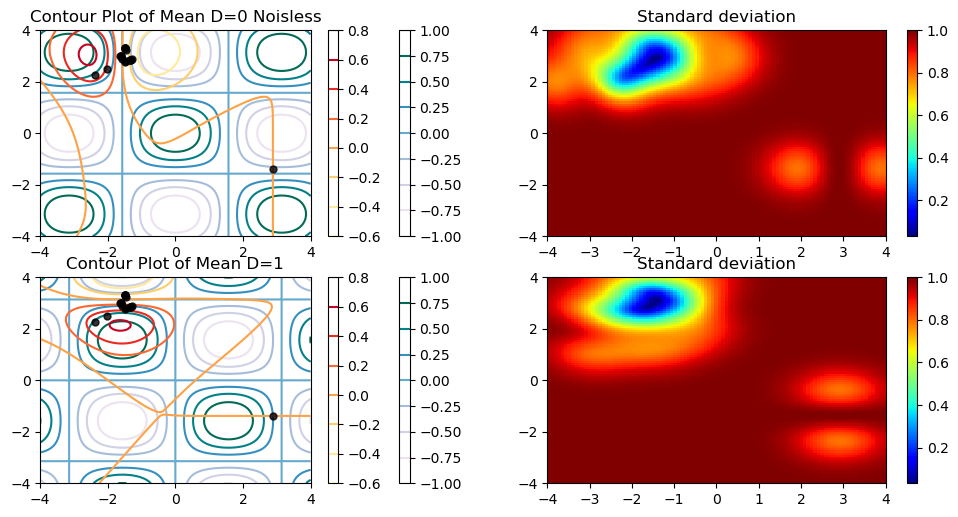

0.9995231724991412


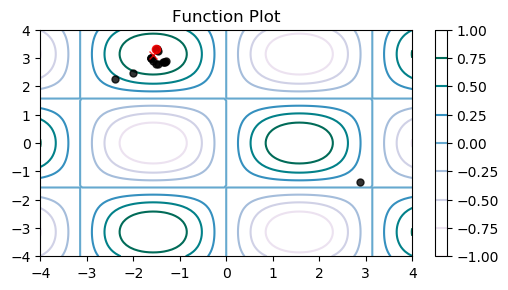

16
recommended x=[-1.61525522  2.98999007] current y=0.988, ymax=0.989


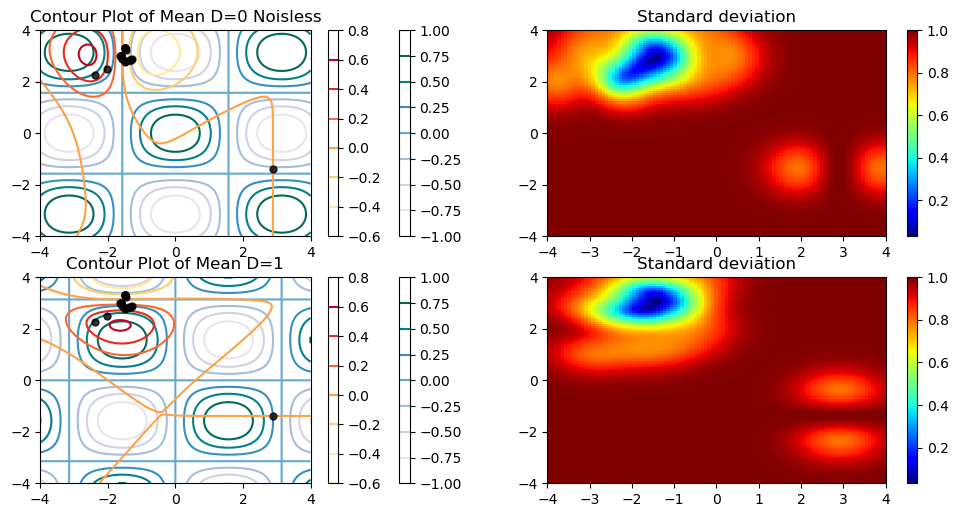

0.9995231724991412


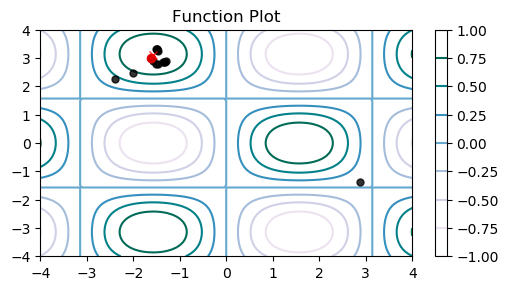

17
recommended x=[-1.50577422  3.31581027] current y=0.983, ymax=0.989


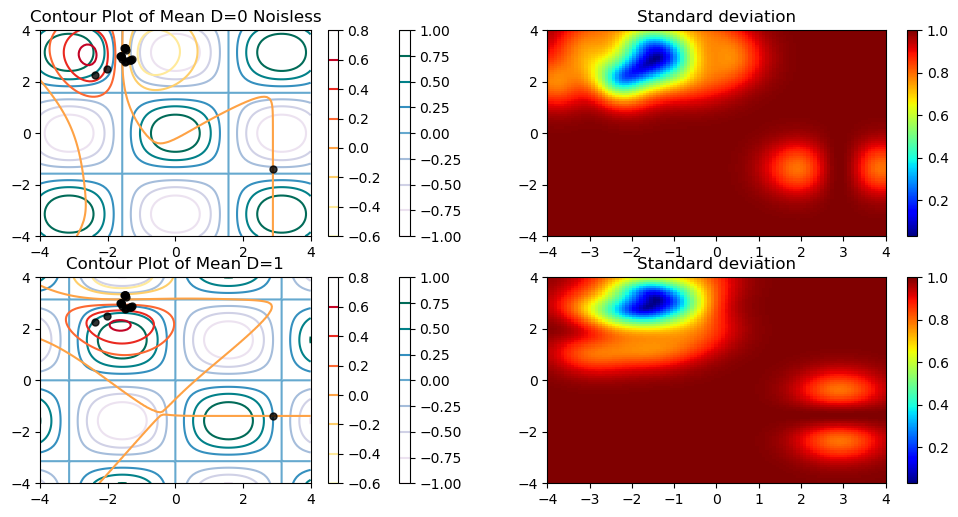

0.9995231724991412


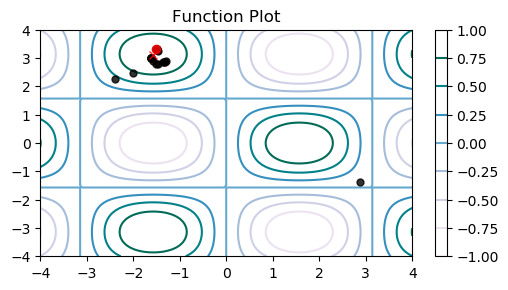

18
recommended x=[-1.61276361  2.98872753] current y=0.987, ymax=0.989


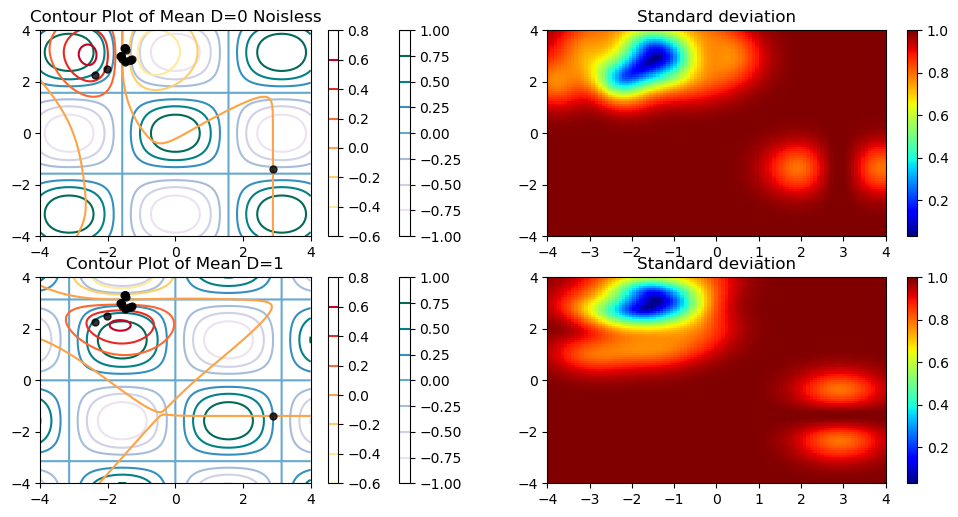

0.9995231724991412


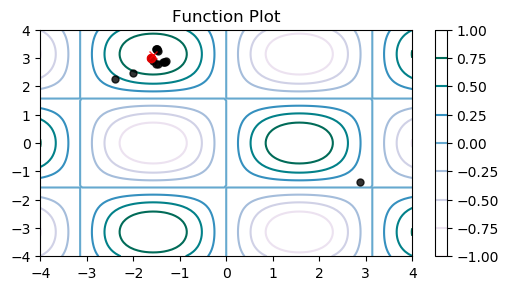

19
recommended x=[-1.50921945  3.31651885] current y=0.983, ymax=0.989


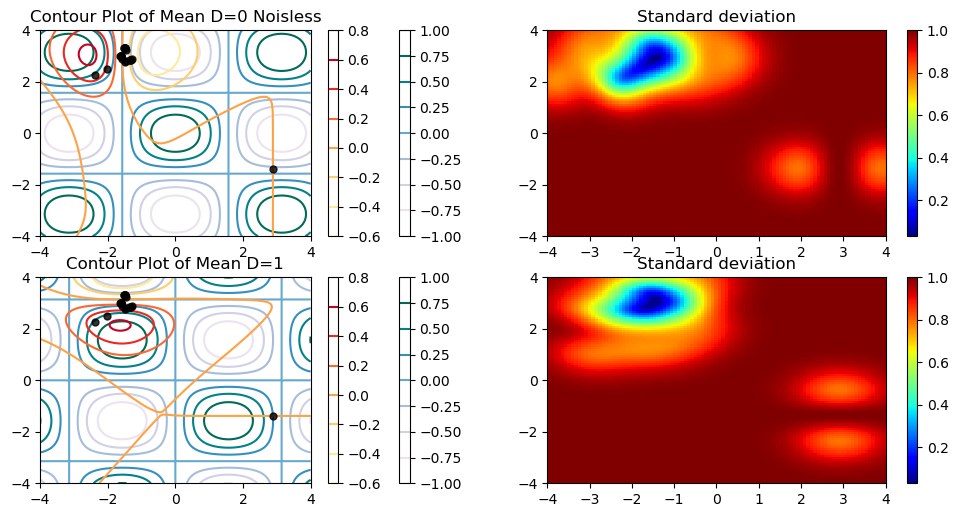

0.9995231724991412


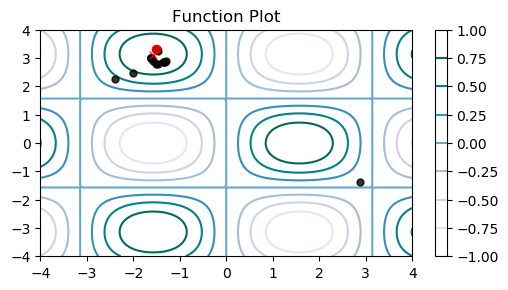

20
recommended x=[-1.61053521  2.98764306] current y=0.987, ymax=0.989


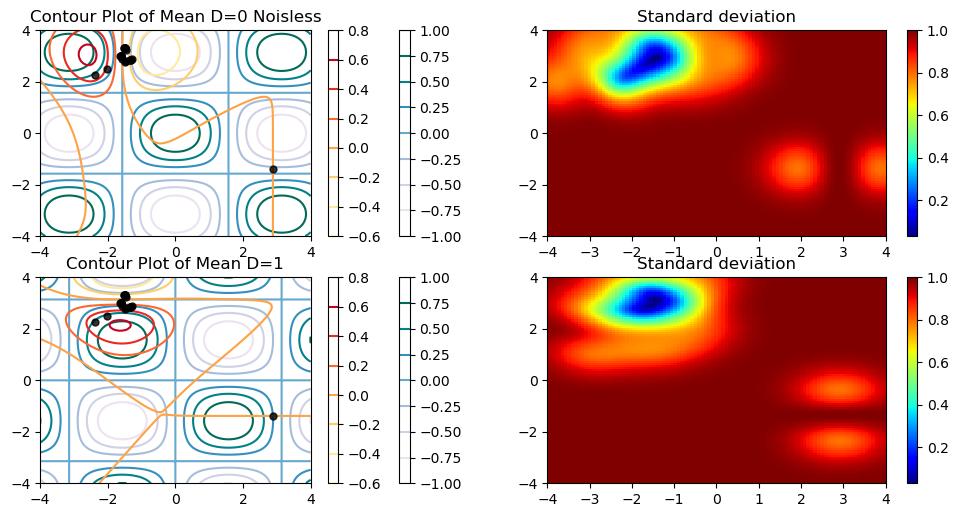

0.9995231724991412


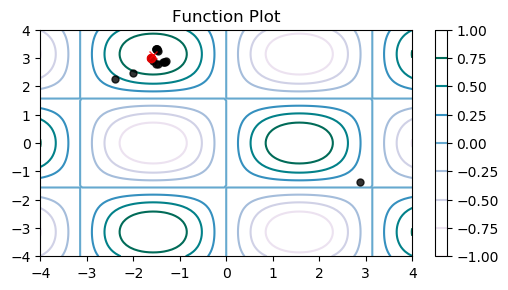

21
recommended x=[-1.5122785   3.31708984] current y=0.983, ymax=0.989


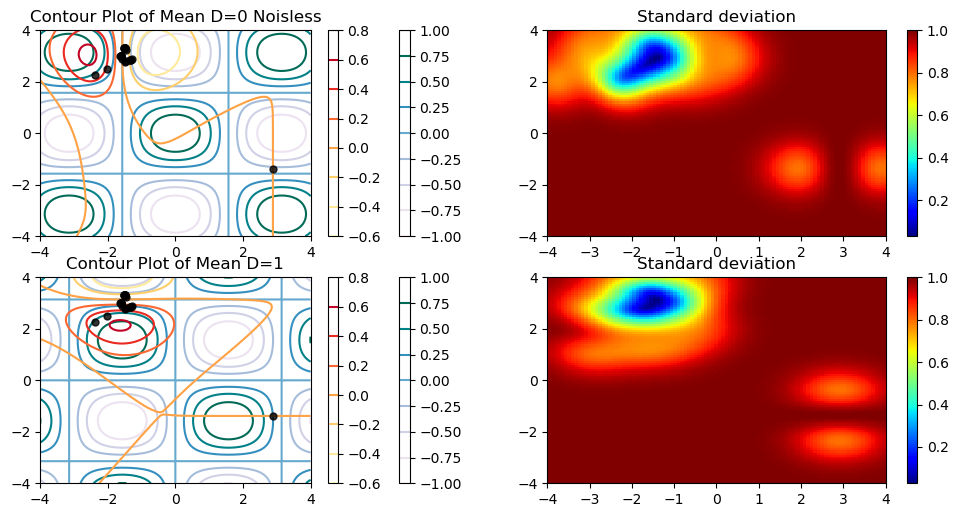

0.9995231724991412


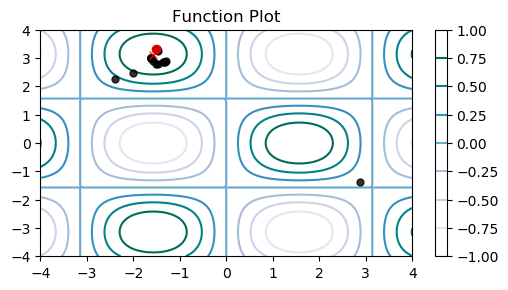

22
recommended x=[-1.6085398   2.98670971] current y=0.987, ymax=0.989


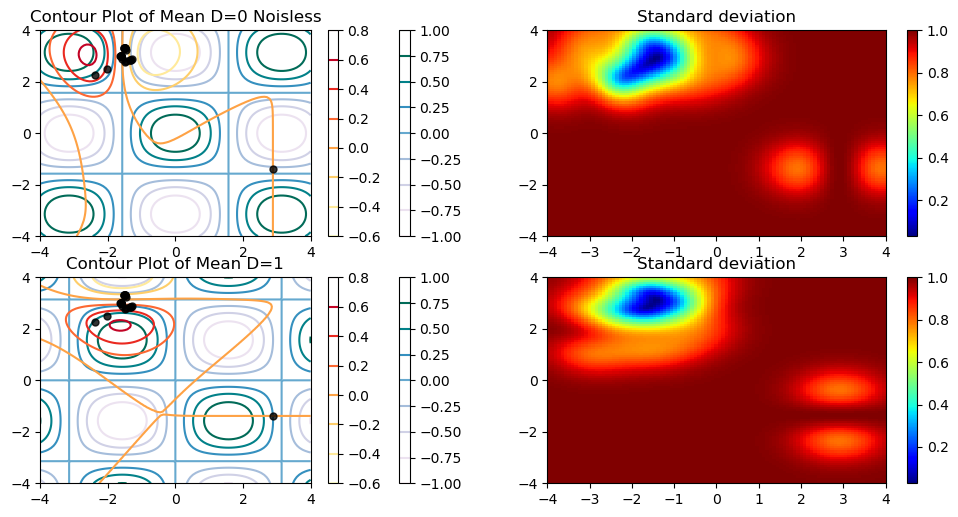

0.9995231724991412


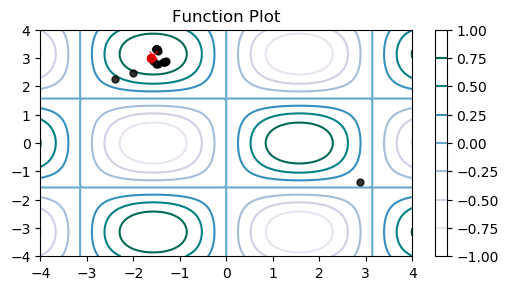

23
recommended x=[-1.51500055  3.31755381] current y=0.983, ymax=0.989


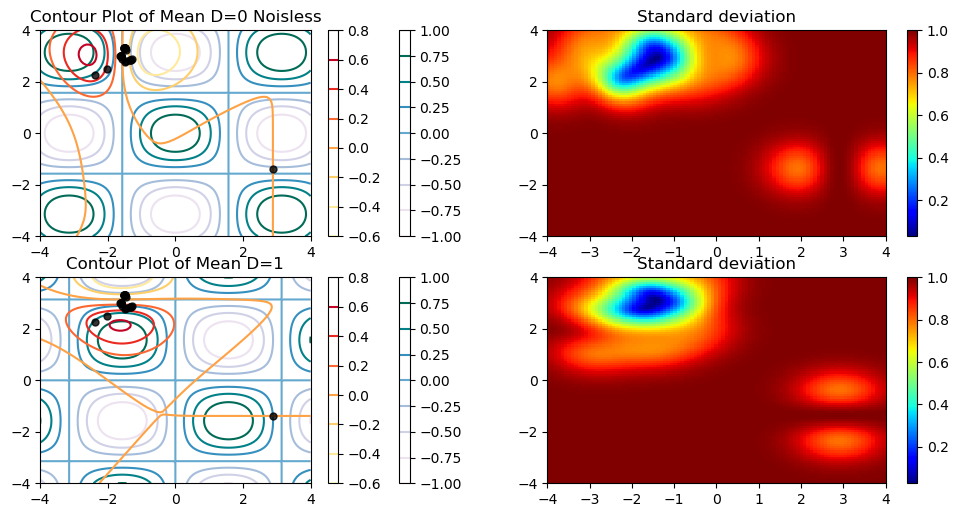

0.9995231724991412


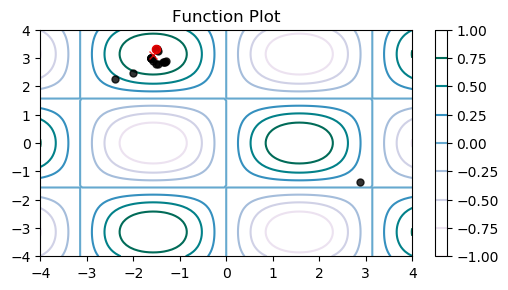

24
recommended x=[-1.60674967  2.98590357] current y=0.987, ymax=0.989


In [5]:
# creaing object and initalizing the first 3 samples.
seed=np.random.randint(1000, size=1)
Bo_test=GP_action(objective.func,function_bounds,Noise,Noise_level,acquation_function)
Bo_test.initiate(seed,n_random_draws=3)


# runs 1 round of optimization 
i=0
for i in range(0,Budget):
    Bo_test.sample_new_value()
    print("recommended x={} current y={:.3f}, ymax={:.3f}".format(Bo_test.X[-1],Bo_test.Y[-1],Bo_test.Y.max()))
    

In [7]:
# Creates the .gif from the saved plots for the 2D_Plots dir.
noise='Noisless' # Noisy or Noisless
filenames = []
for i in range(0,25):
    filename = 'SinCos_'+str(i)+'_'+noise+'.png'
    filenames.append(filename)
frames=[]
for filename in filenames:
    frames.append(imageio.imread('2D_Plots/'+filename))
exportname = 'SinCos_'+noise+'.gif'
kargs = { 'duration': 0.5 }
imageio.mimsave(exportname, frames, 'GIF', **kargs)